# **Lab : Canal discret équivalent**

## Filtre de mise en forme à l'émission

On suppose un filtre de mise en forme en racine de cosinus surélevé noté $h_e(t)$ de roll-off $\beta=0.25$. La version numérique de sa réponse impulsionnelle est de la forme suivante pour $10$ échantillons par symbole.

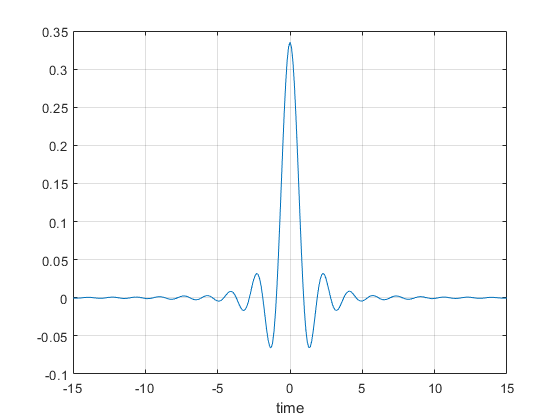

In [1]:
%paramètres filtre émission
beta=0.22;
Ns=10;
Ts=1;
memory=30;
he = rcosdesign(beta, memory, Ns,'sqrt');
figure(1)
plot((-(numel(he)-1)/2:(numel(he)-1)/2)/Ns,he);
grid on
xlabel('time')

## Filtre de global de mise en forme : filtrage adapté partiel, cas Gaussien

Le filtre global de mise en forme dans le cas gaussien (ie. $h_c(t)=\delta(t)$) est donné par $g(t)=h_e(t)*h_r(t)$ où $h_r(t)=h_e^*(-t).$ Par symétrie, on vérifiera que $h_r(t)=h_e(t).$

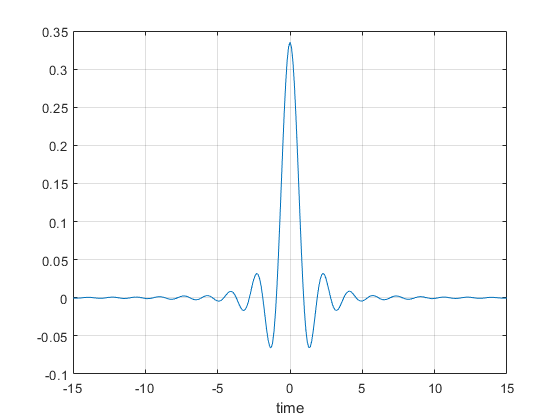

In [2]:
hr=conj(he(end:-1:1));
figure(2)
plot((-(numel(he)-1)/2:(numel(he)-1)/2)/Ns,hr);
grid on
xlabel('time')

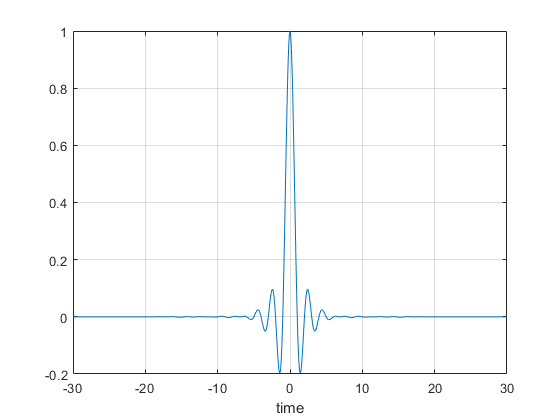

In [3]:
g=conv(hr,he);
figure(3)
plot((-(numel(g)-1)/2:(numel(g)-1)/2)/Ns,g);
grid on
xlabel('time')

Le canal discret équivalent est alors donné par $$h[n]=g(n T_s), \; \forall n \in \mathbb{Z}$$

On obtient alors $$h[n]=\delta[n]$$

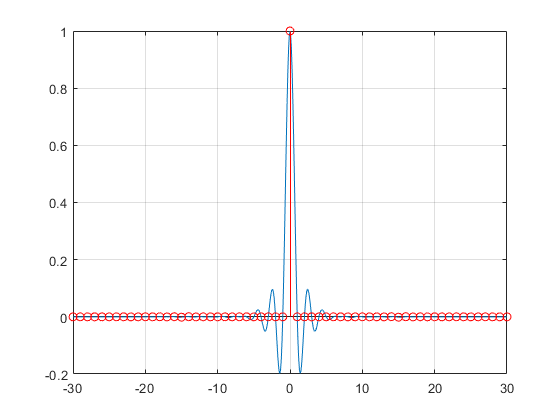

In [4]:
h=g(1:Ns:end);
figure(4)
plot((-(numel(g)-1)/2:(numel(g)-1)/2)/Ns,g);
hold on
stem(-(numel(h)-1)/2:(numel(h)-1)/2,h,'r');
grid on

## Filtre de global de mise en forme : filtrage adapté partiel, cas de deux trajets

On considère maintenant le cas d'un canal équivalent bande de base à deux trajets où par convention on est synchronisé sur le premier trajet ($\tau_0=0$):

$$h_c(t)=\alpha_0 \delta(t) + \alpha_1 \delta(t-\tau_1),$$

où $\alpha_i, \; i=0,1$ sont des coefficients complexe. On observe alors le canal global équivalent suivant :

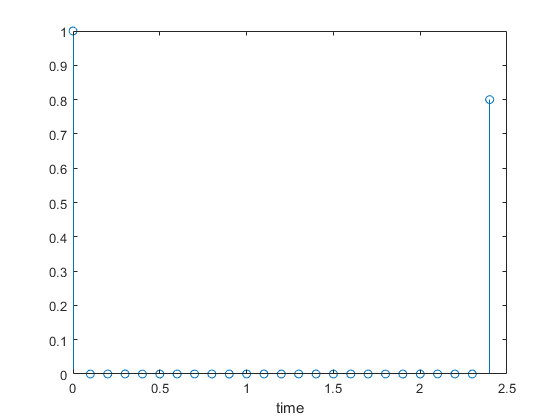

In [5]:
Coefs=[1,0.8];
Delay=Ts*[0, 2.35];
%% Construct hc channel
index_delay=round(Delay/(Ts/Ns));
L=index_delay(end)+1;
hc=zeros(1,L); hc(index_delay+1)=Coefs;

stem((0:numel(hc)-1)/Ns,hc);
xlabel('time')

Par définition, $$h(t)=h_e(t)*h_c(t)*h_r(t)= g(t)*h_c(t)=\alpha_0 g(t) + \alpha_1 g(t-\tau_1)$$


ans =

   625




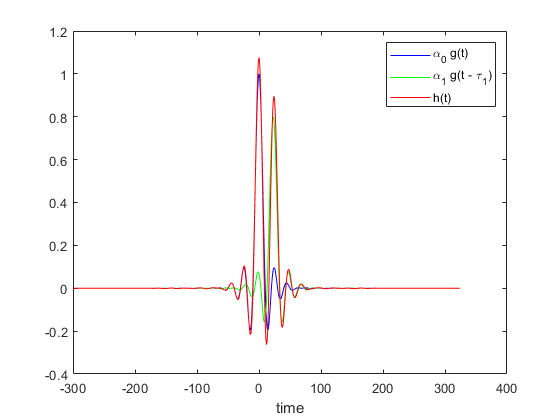

In [12]:
ht=conv(g,hc);
t=(-memory*Ns:(memory*Ns+length(hc)-1));
length(ht)
figure(5)
plot(t(1:numel(g)),g,'b-');
hold on
plot(t(1:numel(g)+index_delay(2)-1),Coefs(2)*[zeros(1,index_delay(2)-1),g],'g-');
plot(t,ht,'r-');
xlabel('time')
legend('\alpha_0 g(t)','\alpha_1 g(t - \tau_1)','h(t)' )

Après échantillonage à $t=nT_s,$ on obtient $$h[n]=(h_e*h_c*h_r)(n T_s), \forall n \in\mathbb{Z}$$

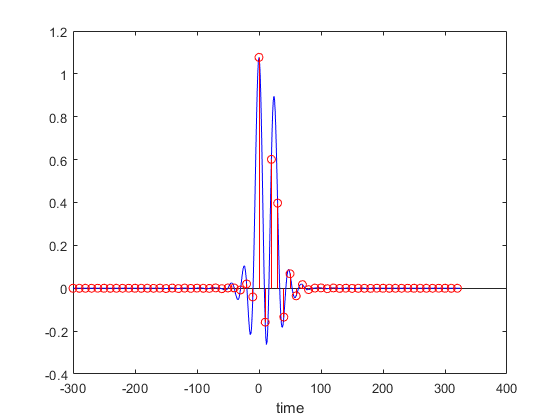

In [15]:
plot(t,ht,'b-');
hold on
stem(t(1:Ns:end),ht(1:Ns:end),'r')
xlabel('time')

## Filtre de global de mise en forme : filtrage adapté global, cas de deux trajets

On veut maintenant regarder le filtre adapté globale ie. 

$$h_r(t)=(h_e*hc)^*(-t),$$

on a alors 

$$h(t)=h_c^*(-t)*h_c(t)*h_e^*(-t)*h_e(t)=g_h(t)*g(t)$$

Regardons tout d'abord le filtre $g_h(t).$

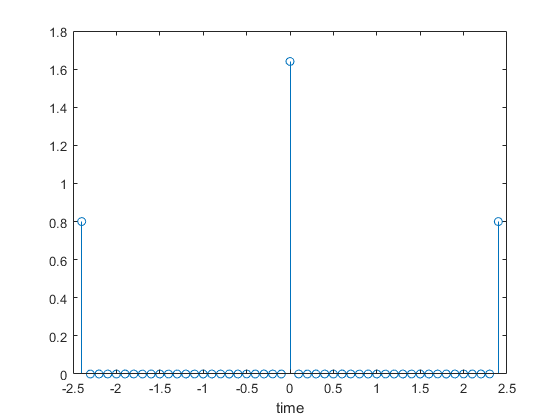

In [8]:
ghc=conv(hc,conj(hc(end:-1:1)));
delays=find(ghc~=0);
coefs=ghc(delays);
T0=(length(ghc)-1)/2;
stem((-(numel(ghc)-1)/2:(numel(ghc)-1)/2)/Ns,ghc);
xlabel('time')

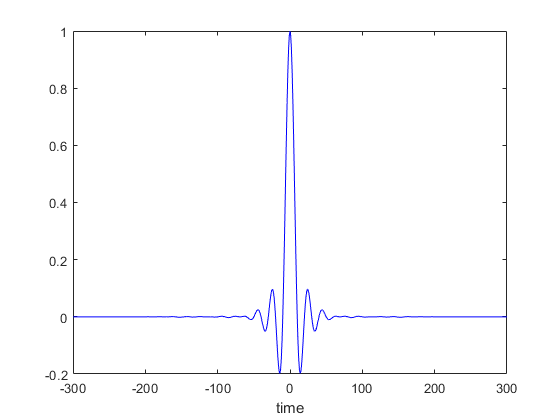

In [9]:
t=(-memory*Ns:(memory*Ns+length(g)-1));
plot(t(1:numel(g)),g,'b-');
hold on
xlabel('time')


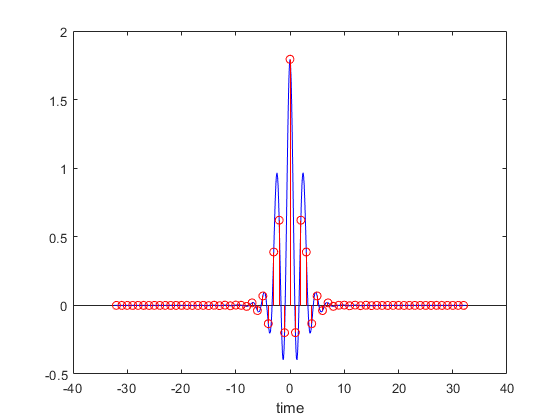

In [10]:
ht=conv(g,ghc);
t=(-(length(ht)-1)/2:(length(ht)-1)/2);
plot(t/Ns,ht,'b-');
hold on
stem([ t((length(ht)-1)/2+1:-Ns:1),t((length(ht)-1)/2+1:Ns:end)]/Ns,[ht((length(ht)-1)/2+1:-Ns:1),ht((length(ht)-1)/2+1:Ns:end)],'r')
xlabel('time')

## Constellation observée sans bruit

On considère une transmission d'une constellation $M$-aire sur un canal Gaussien. Le modèle discret équivalent est donné par

\begin{eqnarray}
y[n]&=h[n]*s[n]+b[n]\\
&=\sum_{k \in\mathbb{Z}}{h[k] s[n-k] + b[n]}.
\end{eqnarray}

En absence de bruit, on obtient le signal suivant 

\begin{eqnarray}
z[n]&=h[n]*s[n]\\
&=\sum_{k \in\mathbb{Z}}{h[k] s[n-k]}.
\end{eqnarray}

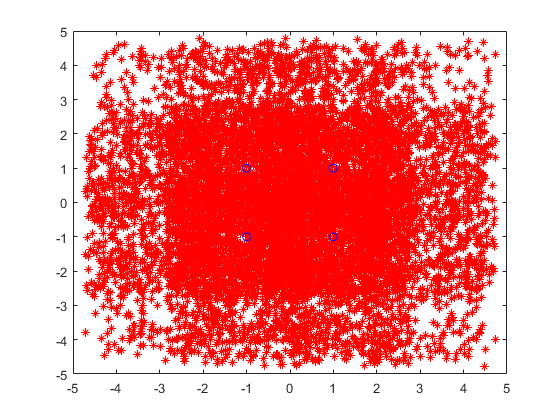

In [11]:
%generation of QAM
M=4;
Nsymb=10000;
x = randi([0, M-1], Nsymb, 1);
s = qammod(x, M, 'gray');
h=ht(1:Ns:end);
z=conv(h, s');
figure
plot(real(z), imag(z) ,'r*')
hold on
plot(real(s), imag(s) ,'bo')